In [3]:
import sys
sys.path.insert(1, '../pro/src') # make sure to use the code in current repo
import lofarSun
from lofarSun import lofarData
import matplotlib.dates as mdates
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

%load_ext autoreload
%autoreload 2

In [4]:
dataset=lofarData.LofarDataBF()
dataset.load_sav_cube('../../sun201707120851.sav')

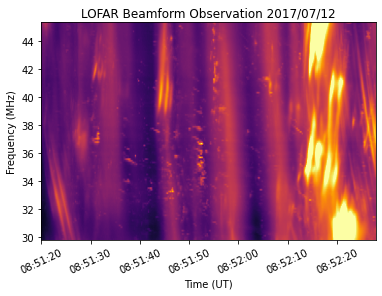

In [5]:
dataset.plot_bf_dyspec()

In [13]:
freq=36
dtime = datetime.datetime(2017, 7, 12, 8, 51, 41, 300000, tzinfo=datetime.timezone.utc)
time=mdates.date2num(dtime)
X,Y,data_bf,x,y,Ibeam=dataset.bf_image_by_freq_time(freq,time,asecpix=20,extrap=True,interpm='cubic')

[102, 51]


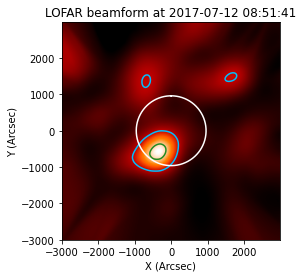

In [14]:
plt.imshow(data_bf)
ax = plt.gca()
im = ax.imshow((data_bf), cmap='gist_heat',
  origin='lower',extent=[np.min(X),np.max(X),np.min(Y),np.max(Y)])
ax.set_xlabel('X (Arcsec)')
ax.set_ylabel('Y (Arcsec)')
ax.set_aspect('equal', 'box')
ax.contour(X,Y,data_bf/np.max(data_bf),levels=[0.5,0.9],colors=['deepskyblue','forestgreen'])
ax.set_title('LOFAR beamform at '+str(dtime)[0:19])
ax.plot(960*np.sin(np.arange(0,2*np.pi,0.001)),
                        960*np.cos(np.arange(0,2*np.pi,0.001)),'w')

ax.get_images()[1].set_clim([0,np.max(data_bf)])

In [15]:
dataset.data_cube.shape
#(freq time beam)

(128, 325, 217)

2017-07-12 08:51:40.884429+00:00
36.175537109375


({'s0': 1104760902954802.9,
  'x_cent': -373.25186069747747,
  'y_cent': -568.0001362523972,
  'tile': 7.083475793018952,
  'x_sig': 417.1806510584707,
  'y_sig': 525.7376273510575},
 {'s0_err': 1.1194503477503877e+26,
  'x_cent_err': 29.122355384864367,
  'y_cent_err': 21.476338559094266,
  'tile_err': 0.003061143080624719,
  'x_sig_err': 65.47770240077335,
  'y_sig_err': 93.49723825739201})

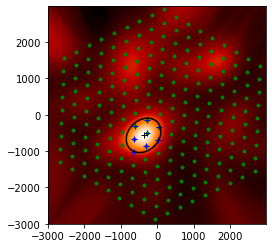

In [16]:
dataset.bf_fit_gauss_source_by_idx(52, 100)